# Applied

## Question 3.8

### a)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf  # Statsmodels is a Python module for statistics
import statsmodels.api as sm

In [3]:
# Load the Auto dataset
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# prepare data for modelling (training set)
X_train = auto['horsepower'] # horsepower as predictor
y_train = auto['mpg']        # mpg as response

X_train.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

In [7]:
droplist = X_train[X_train == '?'].index # get index of observations with '?' value
X_train = X_train.drop(droplist)         # drop those observations
y_train = y_train.drop(droplist)         # ensure dimensional compatibility between variables

In [8]:
d = {'horsepower':X_train.astype('float'), 'mpg':y_train}
df = pd.DataFrame(data=d)
df.head()


,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


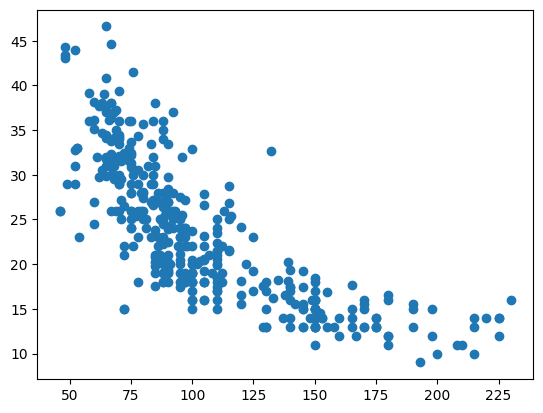

In [9]:
plt.scatter(X_train,y_train);

In [10]:
# Fit a linear regression model
model = smf.ols('mpg ~ horsepower', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.03e-81
Time:                        15:50:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response? ii. How strong is the relationship between the predictor and the response?

Yes, there is a relationship between the predictor and the response. The p-value of the F-statistic is less than 0.05, which indicates that the predictor is significantly related to the response. The R-squared value of 0.605 indicates that 60.5% of the variance in the response variable is explained by the predictor variable. The relationship between the predictor and the response is statistically significant.

iii. Is the relationship between the predictor and the response positive or negative?

The relationship between the predictor and the response is negative. The coefficient of the predictor variable is -0.1578, which indicates that for every one unit increase in the predictor variable (horsepower), the response variable (mpg) decreases by 0.1578 units.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction
intervals?

In [21]:
# Predict mpg for horsepower of 98
new_data = pd.DataFrame({'horsepower': [98]})
predict = sm.add_constant(new_data)
predictions = model.get_prediction(predict)

summary_frame = predictions.summary_frame(alpha=0.05)
print("Predicted mpg for horsepower of 98: ", summary_frame['mean'][0])
print("95% Confidence Interval: ", (summary_frame['mean_ci_lower'][0], summary_frame['mean_ci_upper'][0]))
print("95% Prediction Interval: ", (summary_frame['obs_ci_lower'][0], summary_frame['obs_ci_upper'][0]))

Predicted mpg for horsepower of 98:  24.467077152512427
95% Confidence Interval:  (23.97307896070394, 24.961075344320914)
95% Prediction Interval:  (14.80939607096712, 34.12475823405774)


### b)

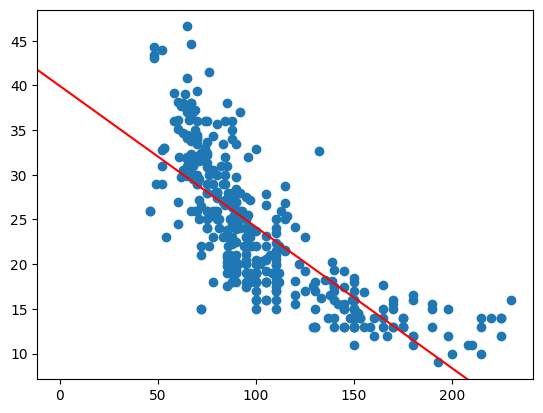

In [24]:
plt.scatter(X_train,y_train)
plt.axline((0, model.params[0]), slope=model.params[1], color='red')
plt.show()

### c)

#### Plot of residue against fitted values

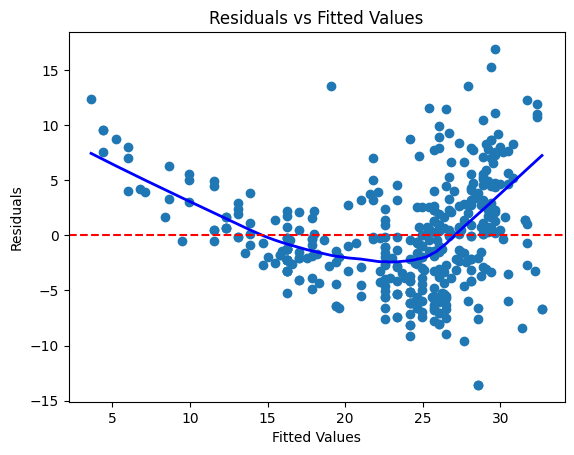

In [26]:
fitted_values = model.fittedvalues
residuals = model.resid
lowess = sm.nonparametric.lowess
z = lowess(residuals, fitted_values)

# Plot the smooth line
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=2, label='LOWESS Smooth Fit')
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

#### Plot of QQ plot

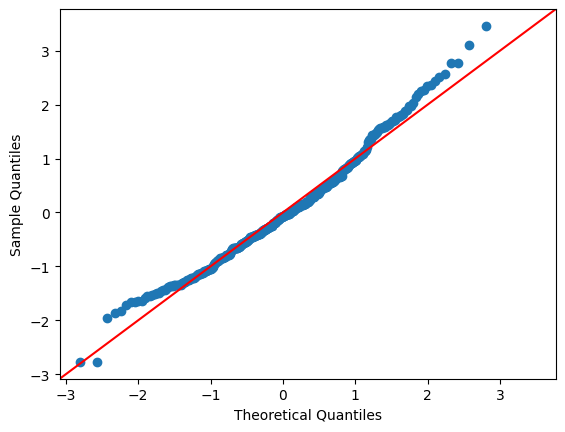

In [30]:
model_norm_residuals = model.get_influence().resid_studentized_internal
sm.qqplot(model_norm_residuals, line ='45')
plt.show()